*****************************************************************
#  The Social Web 
- Instructors: Davide Ceolin.
- TAs: Jacco van Ossenbruggen, Elena Beretta, Mirthe Dankloff.
- Exercises for Hands-on session 1- TAs: Jacco van Ossenbruggen, Elena Beretta, Mirthe Dankloff.
*****************************************************************

Prerequisites:
- Python 3.8
- Python packages: twitter, prettytable, matplotlib

First you need to know how to retrieve some social web data. Exercises 1 and 2 will show you how to retrieve trends and search results from Twitter. 

But let's check first if we're running a sufficiently new version of Python:

In [1]:
import platform
import sys
print("This jupyter notebook is running on Python " + platform.python_version())
# It's good practice to assert packages requirements at the beginning of a script:
assert sys.version_info >= (3, 6)

This jupyter notebook is running on Python 3.9.13


Let's install now the required packages for this hands on session:

In [58]:
# If you're using a virtualenv, make sure its activated before running 
# this cell!
!pip install python-twitter-v2 PrettyTable matplotlib geocoder

  Preparing metadata (setup.py) ... done
  Created wheel for ppretty: filename=ppretty-1.3-py3-none-any.whl size=3993 sha256=14f0ade4d887aa1e05afc59fd757e132b296289a654c38c6cecc631e95b4e147
  Stored in directory: /home/davide/.cache/pip/wheels/81/49/ce/4414a544ac9ea8b16cc1ad9d11f2085d746275781bf1d14650
Successfully built ppretty


## Part 1: Authorizing an application to access Twitter account data:

1. Make sure to add your mobile phone number to your private twitter profile.
2. Go to https://developer.twitter.com/en/portal/dashboard and click on "create an app". Twitter will prompt you to create a *developer account*.
3. You'll receive an *account confirmation* email with a link. Follow it and create an app. 
4. Once the app is created, you'll see a "Keys and Token" item on the top right tab of the webpage. These values will be needed to fill in the next cell.
5. Please delete all your keys before submission.

NOTE: This notebook is based on the API functionalities "Essential" license. Check the "Academic Research" license (right menu, "Twitter API v2", "Academic Research") if you need a broader set of functionalities.

In this notebook, you can use the official Twitter V2 API:

In [42]:
from pytwitter import Api 

CONSUMER_KEY = 
CONSUMER_SECRET = 
# to get the oauth credential you need to click on the 'Generate access token' button:
OAUTH_TOKEN = 
OAUTH_TOKEN_SECRET = 

api = Api(
        consumer_key=CONSUMER_KEY,
        consumer_secret=CONSUMER_SECRET,
        access_token=OAUTH_TOKEN,
        access_secret=OAUTH_TOKEN_SECRET
    )


or the Tweepy API:

In [43]:
import tweepy

client = tweepy.Client(bearer_token=)

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

twapi = tweepy.API(auth)

### 1.1: Retrieving twitter search trends [Only with Academic Research License]

In [44]:
import geocoder

loc = "Amsterdam"

g = geocoder.osm(loc)
closest_loc = twapi.closest_trends(g.lat, g.lng)
trends = twapi.get_place_trends(closest_loc[0]["woeid"])

print(trends[0]["trends"])


Unauthorized: 401 Unauthorized
32 - Could not authenticate you.

### Task 1 [Only with Academic Research License]
Twitter uses WOEIDs. Find out how WORLD_WOE_IDs were originally defined by Yahoo! and try to use others in a query. What kind of differences do you find between the worldwide trends and the local trends? 


In [ ]:
# Your code here
#
#
#
#
#

### 1.2: Retrieving recent Tweets [Any license]

In [65]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

q = '#ThrowbackThursday' # XXX: Set this variable to a trending topic, or anything else you like. 

search_results = client.search_recent_tweets(q) 

# The following code allows you to print in a nice format the contents of search_results
pprint.pprint(search_results, depth=1, width=60)

Response(data=[<Tweet id=1589252346625679362 text='RT @A_GayBoy: #ThrowbackThursday\n\n😈💪 @Baxxxbox \n\n➡️ https://t.co/N8nTrhOpDV\n\n📸 @ZackZerbe https://t.co/Pt398eWGNn'>, <Tweet id=1589252290917302272 text="RT @EliteTrends1: Don't miss the latest in our event listings via https://t.co/ikbqpMpxDv\n#ThrowbackThursday #tbt #TGIF #NewMusicFriday #Fr…">, <Tweet id=1589252243907579907 text='RT @EliteTrends1: Enjoy an evening out  "New Year HiphopReggaeSocaRnB Night" https://t.co/DI4h882UBJ #ThrowbackThursday #tbt #TGIF #NewMusi…'>, <Tweet id=1589252173644566529 text='RT @Chellelovesu: a hot throwback for #throwbackthursday https://t.co/162ZCl0w9j'>, <Tweet id=1589251871008382977 text='RT @Speedangels: #tbt 2015 Speed Angel Ivy at the Wynwood Walls. \nIG at Ivy_inked\nPhotography IG at Miami_sins\n#speedangels #teamspeedangel…'>, <Tweet id=1589251810505940997 text='RT @A_GayBoy: #ThrowbackThursday 😈😈🇧🇷\n\n@superboy_AV &amp; @tiagomarza \n\n➡️ https://t.co/18xNqOB6nq\n➡️ https://t.co/b5GoZy

### Task 2

In the cell below, create a second variable (e.g. `statuses2`) that holds the results of a query other than the one presented above. Think about a query that would yield very different results than the first one, for example one that may yield a shorter output or about a different topic.

In [ ]:
# your code here
#
#
#
#
#
#
print()

## Part 2: Extracting text, screen names, and hashtags from tweets 

Simply printing all the search results to screen is nice, but to really start analysing them, it is handy to select the interesting parts and store them in a different structure such as a list. 

In this example you are using a thing called "List Comprehension".

### 2.1 List Comprehensions
List comprehension is a powerful construct that allows to succinctly build a list.
With it you can process items from any iterable (e.g. dictionaries, lists, tuples, iterators...) and output a list while optionally performing an operation on each value.

Here's a few examples from Mining the Social Web:

In [67]:
# double all values from 0 to 9
double_list = [i*2 for i in range(10)]

# raise to the power of 2, but only if the number is uneven
power_even_list = [i**2 for i in range(10) if i%2!=0]

# clean strings in a tuple
stripped_lines = [x.strip() for x in ('The\n', 'Social\n', 'Web\n')]

# return length of each string in stripped_lines
len_str_lines = [len(s) for s in stripped_lines]

# finally, we can nest list comprehensions to flatten a list of lists:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
range_9 = [x for y in list_of_lists for x in y]

print(double_list)
print(power_even_list)
print(stripped_lines)
print(len_str_lines)
print(range_9)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[1, 9, 25, 49, 81]
['The', 'Social', 'Web']
[3, 6, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2.2 Parsing text, screen names and hashtags from tweets
*(from Example 1-6 in Mining the Social Web)*

Hereafter, we'll be creating a variable `status_texts` of type list. \
The list will be filled with the `text` elements from each `status`, whereas `status` comes from looping through all `statuses` in the `search_results` list (1.2). \
Look up the list comprehensions in your Python reference materials to make sure you understand what's happening here. 

In [77]:
status_texts = [ search_result['id'] for search_result in search_results.data ]
# the escape character "\" allows for the list comprehension to continue
# on a new line. While not strictly necessary, it makes code more readable
# for your fellow programmers.

status_texts = [ search_result['text'] for search_result in search_results.data ]

#hashtags = [ hashtag['text'] for status in statuses \
#        for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w for t in status_texts for w in t.split() ] #split the string on the empty spaces

# Explore the first 5 items for each...
print(json.dumps(status_texts, indent=1))
print(json.dumps(words, indent=1))

[
 "RT @A_GayBoy: #ThrowbackThursday\n\n\ud83d\ude08\ud83d\udcaa @Baxxxbox \n\n\u27a1\ufe0f https://t.co/N8nTrhOpDV\n\n\ud83d\udcf8 @ZackZerbe https://t.co/Pt398eWGNn",
 "RT @EliteTrends1: Don't miss the latest in our event listings via https://t.co/ikbqpMpxDv\n#ThrowbackThursday #tbt #TGIF #NewMusicFriday #Fr\u2026",
 "RT @EliteTrends1: Enjoy an evening out  \"New Year HiphopReggaeSocaRnB Night\" https://t.co/DI4h882UBJ #ThrowbackThursday #tbt #TGIF #NewMusi\u2026",
 "RT @Chellelovesu: a hot throwback for #throwbackthursday https://t.co/162ZCl0w9j",
 "RT @Speedangels: #tbt 2015 Speed Angel Ivy at the Wynwood Walls. \nIG at Ivy_inked\nPhotography IG at Miami_sins\n#speedangels #teamspeedangel\u2026",
 "RT @A_GayBoy: #ThrowbackThursday \ud83d\ude08\ud83d\ude08\ud83c\udde7\ud83c\uddf7\n\n@superboy_AV &amp; @tiagomarza \n\n\u27a1\ufe0f https://t.co/18xNqOB6nq\n\u27a1\ufe0f https://t.co/b5GoZyxsFh https://t.co/HsWj\u2026",
 "RT @EliteTrends1: https://t.co/ikbqpM7WLX offers world-class even

### Task 3

You are now ready to parse usernames, hashtags and text from the results you previously obtained in Task 2 (e.g. `statuses_2`). While doing it, make sure to leave the variables created in 2.2 untouched. Instead, create your own variable names, which you'll be using soon.


In [ ]:
# your code here
#
#
#
#

## Part 3: Creating a basic frequency distribution from words in tweets
*(from Examples 1-7 in Mining the Social Web)* 


In the cell below we display the 10 most common hashtag instances:

In [78]:
from collections import Counter

for item in [words]:
    c = Counter(item)
    
print(c.most_common()[:10]) # top 10

[('RT', 10), ('#ThrowbackThursday', 6), ('#tbt', 5), ('at', 4), ('IG', 4), ('➡️', 3), ('@EliteTrends1:', 3), ('the', 3), ('#TGIF', 3), ('@A_GayBoy:', 2)]


Your output should look something like this: \
`[('ThrowbackThursday', 34), ('throwbackthursday', 11), ('TBT', 6), ('ThrowBackThursday', 6), ('Trivia', 3), ('madoka_magica', 2), ('New', 2), ('EURO2020', 2), ('artists', 2)]`

### Task 4
Show hashtags frequency for results that you obtained in Task 3. Think about possible explanations for the different results you get from the analyses for the different queries.


In [ ]:
# You code here
#
#
#
#
#

### 3.1 Storing your results
So far, we have been storing the data in working memory. Often it's handy to store your data to disk so you can retrieve it in a next session. 

The pickle module lets you do exactly that, by serializing data in a binary format.


In [79]:
import pickle

filepath = "my_data.pickle"
# this indented python syntax is broadly defined as "context manager".
# This means that everything happening under its indentation will use f
# as file handle to filepath. The Shortand `wb` stands for "write binary",
# which is how we serialize data to disk.
with open(filepath, "wb") as f:
    pickle.dump(words, f) # write the contents of list 'words' to file 'f'
    
# Note that, after the end of the indented block, the file is automatically closed.
# Hence, no memory resource on your system is wasted idly.

If you browse to your working directory, you should find a file there named "myData.pickle". You can open this in a text editor, or load its contents back into a variable to do some more analyses on.


In [80]:
# open the myData.pickle file and store its contents into variable 'words'

with open(filepath, "rb") as f:
    words = pickle.load(f)
print(words)

['RT', '@A_GayBoy:', '#ThrowbackThursday', '😈💪', '@Baxxxbox', '➡️', 'https://t.co/N8nTrhOpDV', '📸', '@ZackZerbe', 'https://t.co/Pt398eWGNn', 'RT', '@EliteTrends1:', "Don't", 'miss', 'the', 'latest', 'in', 'our', 'event', 'listings', 'via', 'https://t.co/ikbqpMpxDv', '#ThrowbackThursday', '#tbt', '#TGIF', '#NewMusicFriday', '#Fr…', 'RT', '@EliteTrends1:', 'Enjoy', 'an', 'evening', 'out', '"New', 'Year', 'HiphopReggaeSocaRnB', 'Night"', 'https://t.co/DI4h882UBJ', '#ThrowbackThursday', '#tbt', '#TGIF', '#NewMusi…', 'RT', '@Chellelovesu:', 'a', 'hot', 'throwback', 'for', '#throwbackthursday', 'https://t.co/162ZCl0w9j', 'RT', '@Speedangels:', '#tbt', '2015', 'Speed', 'Angel', 'Ivy', 'at', 'the', 'Wynwood', 'Walls.', 'IG', 'at', 'Ivy_inked', 'Photography', 'IG', 'at', 'Miami_sins', '#speedangels', '#teamspeedangel…', 'RT', '@A_GayBoy:', '#ThrowbackThursday', '😈😈🇧🇷', '@superboy_AV', '&amp;', '@tiagomarza', '➡️', 'https://t.co/18xNqOB6nq', '➡️', 'https://t.co/b5GoZyxsFh', 'https://t.co/HsWj…',

### 3.2 Using prettytable to display tuples in a nice way



In [85]:
from prettytable import PrettyTable


pt = PrettyTable(field_names=['Words', 'Count'])
c = Counter(words)
[ pt.add_row(kv) for kv in c.most_common()[:10] ]
pt.align["Words"], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt) 

+--------------------+-------+
| Words              | Count |
+--------------------+-------+
| RT                 |    10 |
| #ThrowbackThursday |     6 |
| #tbt               |     5 |
| at                 |     4 |
| IG                 |     4 |
| ➡️                  |     3 |
| @EliteTrends1:     |     3 |
| the                |     3 |
| #TGIF              |     3 |
| @A_GayBoy:         |     2 |
+--------------------+-------+


### 3.3 Calculating lexical diversity for tweets 
*(from Example 1-9 in Mining the Social Web)*:

In [89]:
# Define a function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

# Define a function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in status_texts ])
    return 1.0*total_words/len(statuses) 

# Let's use these functions:

print(lexical_diversity(words))
print(average_words(words))

0.7248322147651006
1.0


### Task 5: What do the printed numbers indicate? Try to explain them.

(*Double click this cell to write your answer*)

### 3.4 Looking up users who have retweeted a status 
*(from Example 1-11 in Mining the Social Web):*

In [97]:
retweets = client.get_retweeters(id=1224140327688249349) # Get the original tweet id for a tweet from its retweeted_status node and insert it here
print("Users who've retweeted the tweet:\n")
print([retweets])

Users who've retweeted the tweet:

[Response(data=[<User id=289180596 name=mattias username=mblandnc>, <User id=1225532665849405448 name=connor username=Connormccoolman>, <User id=1198130211226898432 name="Robert Mueller" username=DarnMilk>, <User id=2382629469 name=Coy Holt username=coy_holt>, <User id=1184868443679526913 name=HarleyBee 🐝 username=QueenHarleyBee>, <User id=54946944 name=Marko ⭐️⭐️⭐️⭐️⭐️⭐️ username=MARKOPOLO100>, <User id=4061282055 name=Samuel Kutzer username=SHAK_08>, <User id=279634273 name=Sebastian username=saabooboo>, <User id=15712221 name=smirnoff ice enjoyer username=notJacksonfish>, <User id=329920551 name=Martinez username=MartinFaced>, <User id=3883486521 name=Haha Lexis username=cestkisa>, <User id=263972455 name=Ernesto Garza username=elchivo72>, <User id=2263463959 name=elon’s musk 🏳️‍🌈 username=abrewer18>, <User id=57758833 name=Smitty Werbenmanjensen username=ChrEEstosK>, <User id=1516575908 name=c🦃rm🎄c username=McCormacSpices>, <User id=77604984458236

### Task 6 (advanced)

If you have a Twitter account with a nontrivial number of tweets, request your historical tweet archive from your account settings and analyze it. \
The export of your account data includes files organized by time period in a convenient JSON format. See the README.txt file included in the downloaded archive for more details. 



What are the most common terms that appear in your tweets? \
Who do you retweet the most often? \
How many of your tweets are retweeted (and why do you think this is the case)?

### 3.6 Plotting frequencies of words 
*(from Example 1-12 in Mining the Social Web)*


In the previous exercises we have been looking at the text from the tweets, but when you retrieved the results, you retrieved much more information about the tweets, such as the username of the person who shared this tweet with the world. 


You can use this information to find out who retweets whom in our examples. 

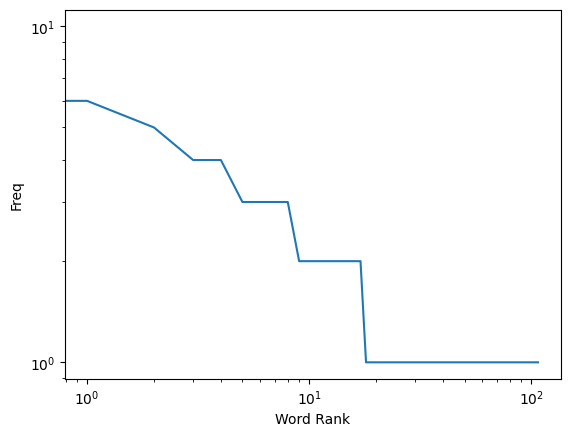

In [98]:
word_counts = sorted(Counter(words).values(), reverse=True)
import matplotlib.pyplot as plt
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.show()

### Generating histograms of words, screen names, and hashtags 
*(from Example 1-13 in Mining the Social Web):*

In [102]:
c = Counter(words)
plt.hist(c.values())
    
plt.title("")
plt.ylabel("Number of items in bin")
plt.xlabel("Bins (number of times an item appeared)")
    
plt.figure()

ValueError: too many values to unpack (expected 2)

In [ ]:
# extra: seaborn plots with a one-liner.
!pip install seaborn
import seaborn as sns

sns.distplot(word_counts, kde=False, rug=True)
